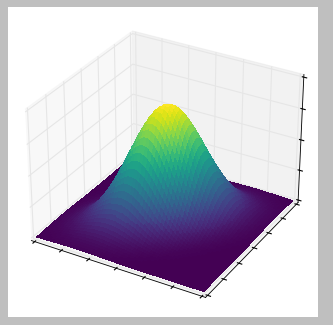

In [2]:
from scipy.stats import multivariate_normal
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.style.use('classic')
# Redefine the parameters for the bivariate normal distribution
mean = [0, 0]  # mean values for x and y
cov = [[1, 0.5], [0.5, 1]]  # covariance matrix
bivariate_normal_distribution = multivariate_normal(mean=mean, cov=cov)

x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Calculate the bivariate normal distribution's PDF over the grid
pdf_values = bivariate_normal_distribution.pdf(pos)
# Set up the figure
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, pdf_values, cmap='viridis', linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)


ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])

# Show the plot
plt.savefig(f'points_3d normal_plane_continuouse.pdf', bbox_inches='tight')
plt.show()


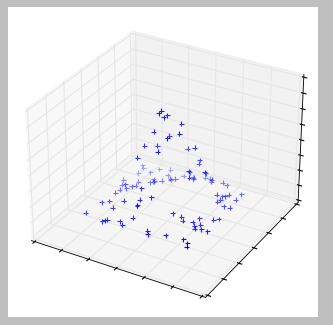

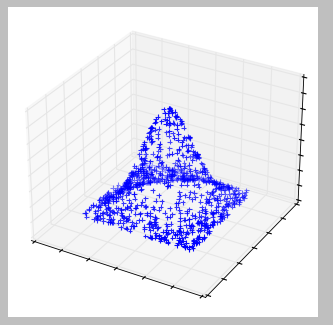

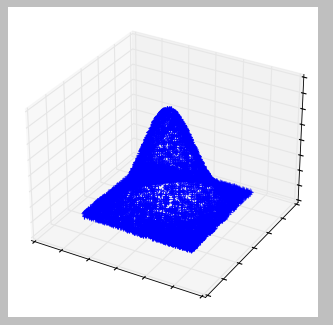

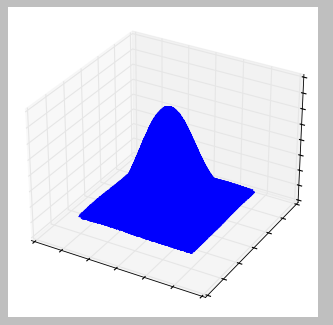

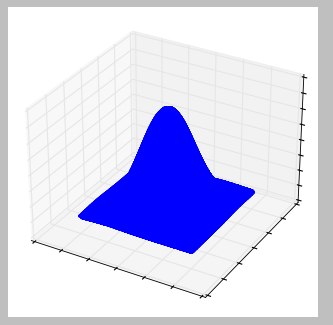

In [11]:
def compute_normal(x, y, z):
    norm = (np.array([x, y, z]) - [0, 0, 0])

    distacnce = sum(norm * norm) ** 0.5

    return norm / distacnce


for num_samples in [10 ** x for x in range(2, 7)]:
    # Generate random points from the bivariate normal distribution

    random_points = np.random.random((num_samples, 2)) * 6 - 3

    # Plot the 3D scatter plot of the random points along with the surface
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface.
    # ax.plot_surface(x, y, pdf_values, cmap='viridis', linewidth=0, alpha=0.5, antialiased=False)

    # Plot the random points as dots on the plot

    milion = 10 ** 6 / max(max(abs(random_points[:, 1])), max(abs(random_points[:, 0]))) - 1

    z = bivariate_normal_distribution.pdf(random_points) * milion

    ax.scatter(random_points[:, 0] * milion, random_points[:, 1] * milion,
               z, c='b', marker='+')

    # plt.xlabel('X-axis')
    # plt.ylabel('Y-axis')
    # ax.set_zlabel('Probability Density')
    # ax.set_title('3D Scatter Plot of Random Points from Bivariate Normal Distribution')

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_zticklabels([])

    # Show the plot
    if num_samples > 10 ** 3:
        plt.savefig(f'points_3d normal_plane_{num_samples}.png', bbox_inches='tight', dpi=300)
    else:
        plt.savefig(f'points_3d normal_plane_{num_samples}.pdf', bbox_inches='tight')

    random_points *= milion

    normals = [compute_normal(x, y, z) for [x, y], z in zip(random_points, z)]
    # print(normals)

    with open(f'points_3d_normal_plane_{num_samples}.txt', 'w') as f:
        for [x, y], z, [normx, normy, normz] in zip(random_points, z, normals):
            f.write(f'{x} {y} {z} {normx} {normy} {normz}\n')

    # print(min(random_points[:, 0]), min(random_points[:, 1]), max(random_points[:, 0]), max(random_points[:, 1]))



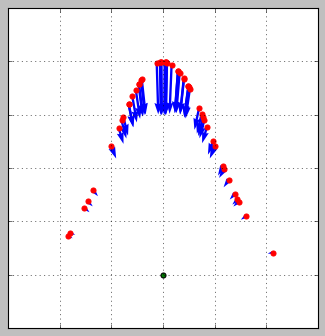

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def normal(x):
    return ((1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2))


def compute_normal_2d(x, y):
    norm = -np.array([x, y])  # Přidá minus pro směrování k počátku
    distance = sum(norm * norm) ** 0.5
    return norm / distance


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# Parametry pro normální rozdělení
mean = 0  # střední hodnota μ
std_dev = 1  # směrodatná odchylka σ

randompoints = np.random.normal(mean, std_dev, 50)

shits = [normal(x) for x in randompoints]

normal = np.array([np.array((compute_normal_2d(x, y))) for x, y in zip(randompoints, shits)])

plt.grid(True)

ax.set_yticklabels([])
ax.set_xticklabels([])

normal *= 0.5

# Vytvoření grafu
ax.quiver(randompoints, shits, normal[:, 0], normal[:, 1], color='b', scale=5, scale_units='xy', angles='xy',
          headwidth=3)
ax.scatter(randompoints, shits, color='r')

ax.set_xlim(-3, 3)

ax.scatter(0, 0, c='g')

plt.savefig(f'points_2d_normals_ilustration.pdf', bbox_inches='tight')


In [5]:
normal[:, 0]

array([ 0.38002288,  0.05308675,  0.49779798,  0.41759503, -0.48613148,
        0.39640372, -0.45645393, -0.41024713, -0.08369508, -0.46369477,
        0.49831498, -0.37110486, -0.49253792, -0.40651998,  0.14625652,
       -0.49781658, -0.04075512,  0.03704625, -0.47009845,  0.39921637,
        0.45030001, -0.49317528,  0.49961748, -0.46721285, -0.47543852,
        0.49661898, -0.49519437, -0.36877698,  0.43565114,  0.49951998,
       -0.4976217 ,  0.47609803, -0.49990471, -0.08036168, -0.19432097,
        0.07253351,  0.46660105, -0.49705511, -0.32374311, -0.4154638 ,
        0.48616468, -0.30117411, -0.30292022,  0.37319435, -0.49883573,
        0.47042305, -0.09497282, -0.40566352,  0.45080915, -0.48405604])

In [6]:
for i in range(0, 50):
    random_points = bivariate_normal_distribution.rvs(size=100)

    milion = 10 ** 6 / max(max(abs(random_points[:, 1])), max(abs(random_points[:, 0]))) - 1

    z = bivariate_normal_distribution.pdf(random_points) * milion

    random_points *= milion

    normals = [compute_normal(x, y, z) for [x, y], z in zip(random_points, z)]
    # print(normals)

    with open(f'points_3d_testedpoints_{i}.txt', 'w') as f:
        for [x, y], z, [normx, normy, normz] in zip(random_points, z, normals):
            f.write(f'{x} {y} {z} {normx} {normy} {normz}\n')


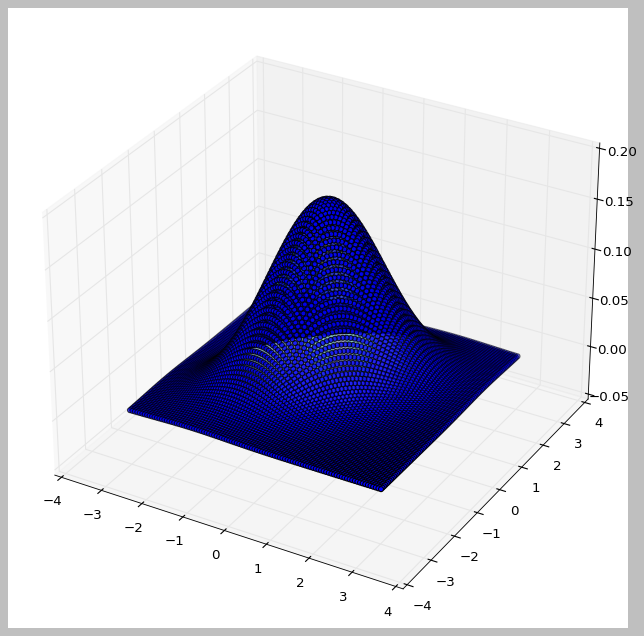

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definujeme počet bodů na každé ose
num_points = 100

# Rozsah hodnot pro x a y
x_values = np.linspace(-3, 3, num_points)
y_values = np.linspace(-3, 3, num_points)

# Vytvoříme mřížku bodů
x_grid, y_grid = np.meshgrid(x_values, y_values)

# Pro každý bod v mřížce vypočítáme hodnotu pdf a z
z = bivariate_normal_distribution.pdf(np.column_stack((x_grid.ravel(), y_grid.ravel())))
z = z.reshape(x_grid.shape)

# Vytvoříme 3D graf
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.plot_surface(x_grid, y_grid, z, cmap='viridis', linewidth=0, alpha=0.5, antialiased=False)

# Vyplníme body
ax.scatter(x_grid, y_grid, z, c='b', marker='o')

plt.show()
